In [1]:
import pandas as pd

## 1. Problem statements.

In [2]:
data = pd.read_csv('banklist.csv')
banklist_dt = pd.DataFrame(data)
banklist_dt.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",26-Apr-24,10546
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540


# Data Source

### This dataset from FDIC contains information about banks that have failed, including details such as the bank name, city, state, certification number, acquiring institution, closing date, and fund.

### Link: https://catalog.data.gov/dataset/fdic-failed-bank-list

## Inquiry Question: What trends can be identified from examining the failures of banks in recent years?

### Sub-questions:

### 1. Is there a common trend in terms of geographic location for these bank failures?
### 2. What is the relationship between certification numbers and acquiring institutions?
### 3. How has the frequency of bank failures changed over time?

## 2. Data cleaning.

In [15]:
# a. Drop any unwanted features if necessary.
banklist_dt = banklist_dt.dropna()

# remove name spaces leading/trailing spaces.
banklist_dt.columns = banklist_dt.columns.str.strip()
banklist_dt

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",26-Apr-24,10546
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
...,...,...,...,...,...,...,...
564,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,6004
565,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,4648
566,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,4647
567,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,4646


In [16]:
#b. Check if there are any missing values and address them.
banklist_missing_value = banklist_dt.isnull().sum()
banklist_missing_value

Bank Name                0
City                     0
State                    0
Cert                     0
Acquiring Institution    0
Closing Date             0
Fund                     0
dtype: int64

In [17]:
# c. Check if any duplicates and address them.
banklist_duplicates = banklist_dt.duplicated().sum()
print(f'Number of duplicates in the dataset is {banklist_duplicates}')

Number of duplicates in the dataset is 0


In [18]:
# d. Check the data type of each column and correct them if any.
banklist_dt.dtypes

Bank Name                object
City                     object
State                    object
Cert                      int64
Acquiring Institution    object
Closing Date             object
Fund                      int64
dtype: object

In [24]:
# The closing date is object, changed it to date
banklist_dt['Closing Date'] = pd.to_datetime(banklist_dt['Closing Date'])
banklist_dt.dtypes

Bank Name                        object
City                             object
State                            object
Cert                              int64
Acquiring Institution            object
Closing Date             datetime64[ns]
Fund                              int64
dtype: object

In [65]:
# e. For categorical variables, check if there are any inconsistent inputs and address
banklist_dt['State'] = banklist_dt['State'].str.upper()
particular_state = banklist_dt[banklist_dt['State'] == 'WI']
particular_state

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
17,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003.0,First-Citizens Bank & Trust Company,2017-05-05,10260.0
26,North Milwaukee State Bank,Milwaukee,WI,20364.0,First-Citizens Bank & Trust Company,2016-03-11,10260.0
59,Bank of Wausau,Wausau,WI,35016.0,Nicolet National Bank,2013-08-09,10485.0
63,Banks of Wisconsin d/b/a Bank of Kenosha,Kenosha,WI,35386.0,"North Shore Bank, FSB",2013-05-31,10478.0
195,Legacy Bank,Milwaukee,WI,34818.0,Seaway Bank and Trust Company,2011-03-11,10348.0
203,Badger State Bank,Cassville,WI,13272.0,Royal Bank,2011-02-11,10339.0
211,Evergreen State Bank,Stoughton,WI,5328.0,McFarland State Bank,2011-01-28,10332.0
228,First Banking Center,Burlington,WI,5287.0,First Michigan Bank,2010-11-19,10315.0
252,Maritime Savings Bank,West Allis,WI,28612.0,"North Shore Bank, FSB",2010-09-17,10291.0
413,Bank of Elmwood,Racine,WI,18321.0,Tri City National Bank,2009-10-23,10132.0


In [35]:
# f. For numeric variables, check any outliers and remove them or replace them with a certain value. 
numeric_variables_columns = banklist_dt.select_dtypes(include=['float64', 'int64']).columns
for columns in numeric_variables_columns:
    banklist_dt[columns] = banklist_dt[columns].apply(lambda x: x if x < banklist_dt[columns].quantile(0.95) else banklist_dt[columns].median())

## 3. Exploratory data Analysis and Interpretation of the results.

### a. Process the data. Use a pivot table or other functions to generate the result you want.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
pivot_table = banklist_dt.pivot_table(index='State', values='Bank Name', aggfunc='count')
pivot_table.sort_values(by='Bank Name', ascending=False)

,Bank Name
State,
GA,93
FL,76
IL,69
CA,43
MN,23
WA,19
AZ,16
MO,16
MI,14


### b. Create a graph to visualize the result.

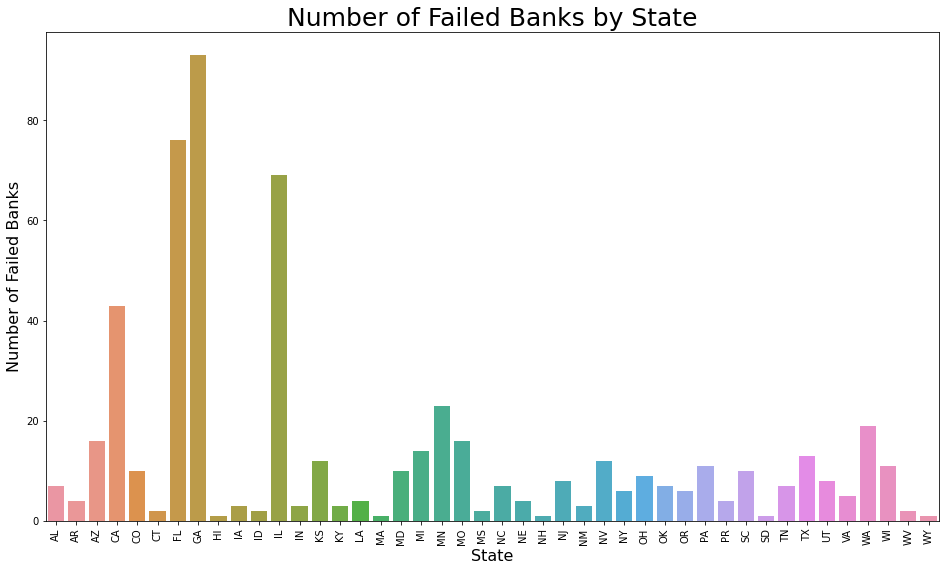

In [61]:
# Bar plot size
plt.figure(figsize=(16, 9))

# Bar plot
sns.barplot(x=pivot_table.index, y=pivot_table['Bank Name'])

# Ttile
plt.title('Number of Failed Banks by State', size=25)

# X axis
plt.xlabel('State', size=16)

# Y axis
plt.ylabel('Number of Failed Banks', size=16)

# Rotate x axis
plt.xticks(rotation=90)
plt.show()

### c. Interpret the result. Explain your findings. 

### Interpretation: The bar chart shows the number of failed banks by state. Georgia has the highest count of 93 failed banks. This indicates that Georgia has more financial instability or other underlying issues causing bank failure.

## 4. Summarize the main findings from this project as well as what you failed to find from the results. Describe what you need to further explore about the topic

### Summary: The graph shows the number of failed banks by state over a specified period. Overall, the data reveals significant trends in the geographic distribution and frequency of bank failures. Georgia has the highest number of 93, followed by Florida with 76, Illinois with 69 failed banks, and the other states below 50 failed banks.
### The unnoticed trend in the graph is the state with the lowest bank failures. Wisconsin, Massachusetts, South Dakota, New Hampshire, and Hawaii have the lowest bank failure rates at 1, and I could safely say there is financial stability in those states.

### I could not figure out if there is any noticeable relationship between certification numbers and funds, suggesting patterns in bank acquisitions.

### Further Exploration: Investigate the underlying causes of high bank failure rates in those specific states, then analyze the impact of economic factors on bank failures. Finally, Explore the role of regulatory changes in the frequency of bank failures.